In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# def testMLP(x_train, y_train, x_test, y_test):
# Preprocess the data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# One-hot encode the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),  # 128 neurons in the first hidden layer
    Dense(64, activation='relu'),  # 64 neurons in the second hidden layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128)



Epoch 1/5


469/469 [==============================] - 2s 3ms/step - loss: 0.3360 - accuracy: 0.9034
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1340 - accuracy: 0.9606
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0930 - accuracy: 0.9714
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0561 - accuracy: 0.9828


In [50]:
class NeuronActivationComputer:
    def __init__(self, model):
        self.model = model

    def compute_activations(self, x_test, y_test):
        num_classes = y_test.shape[-1]

        # Get the layer outputs for the test data
        layer_outputs = []
        for layer in self.model.layers:
            if hasattr(layer, 'output'):
                layer_model = tf.keras.Model(inputs=self.model.input, outputs=layer.output)
                layer_outputs.append(layer_model.predict(x_test))

        # Compute the neuron activations averaged for each label and each layer
        layer_activations = []
        for outputs in layer_outputs:
            num_neurons_in_layer = outputs.shape[-1]
            layer_activation = np.zeros((num_classes, num_neurons_in_layer))
            for label_idx in range(num_classes):
                layer_activation[label_idx] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
            layer_activations.append(layer_activation)

        return layer_activations

    def visualize_activations(self, layer_idx, class_idx=None):
        layer_activations = self.compute_activations(x_test, y_test)
        activations = layer_activations[layer_idx]

        if class_idx is None:
            # Visualize activations for all classes
            fig, axs = plt.subplots(2, 5, figsize=(15, 10))
            axs = axs.flatten()  # Flatten the array of axes to easily iterate over it

            for class_label, class_activations in enumerate(activations):
                # Convert activations to numpy array for plotting
                class_activations = np.array(class_activations)

                # Create a bar plot for the activations
                axs[class_label].bar(range(len(class_activations)), class_activations)
                axs[class_label].set_title(f'Activations for Class {class_label}')
                axs[class_label].set_xlabel('Activation Index')
                axs[class_label].set_ylabel('Activation Value')

            plt.tight_layout()
            plt.show()
        else:
            # Visualize activations for a specific class
            print(f"Class {class_idx}:")
            print(activations[class_idx])

    def visualize_activations_for_neuron(self, layer_idx, neuron_idx):
        layer_activations = self.compute_activations(x_test, y_test)
        activations = layer_activations[layer_idx]

        # Visualize the activations for the specified neuron
        neuron_activations = [class_activations[neuron_idx] for class_activations in activations]
        plt.bar(range(len(neuron_activations)), neuron_activations)
        plt.title(f'Activations for Neuron {neuron_idx}')
        plt.xlabel('Class Index')
        plt.ylabel('Activation Value')
        plt.show()

    def visualize_activations_for_layer(self, visual_type):
        layer_outputs = []
        for layer in model.layers:
            if hasattr(layer, 'output'):
                layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
                layer_outputs.append(layer_model.predict(x_test))

        # Compute the neuron activations averaged for each label and each layer
        layer_activations = []
        for outputs in layer_outputs:
            num_neurons_in_layer = outputs.shape[-1]
            layer_activation = np.zeros((num_classes, num_neurons_in_layer))
            for label_idx in range(num_classes):
                layer_activation[label_idx] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
            layer_activations.append(layer_activation)

        # Visualize the activations for each layer
        if visual_type == 1:
            for layer in layer_activations:
                plt.figure(figsize=(5, 12))  # Set the initial figure size
                plt.matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
                plt.gcf().set_figheight(5)
                plt.gcf().set_figwidth(30)
                plt.show() 
        elif visual_type == 2:
            fig = plt.figure(figsize=(15, 10))

            gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1]) 
            ax0 = plt.subplot(gs[0, :])
            ax1 = plt.subplot(gs[1, 0])
            ax2 = plt.subplot(gs[1, 1])
            ax3 = plt.subplot(gs[1, 2])

            axes = [ax0, ax1, ax2, ax3]

            for i, ax in enumerate(axes):
                layer = layer_activations[i]
                im = ax.matshow(layer, cmap='hot', interpolation='nearest', aspect=10)
                ax.set_title(f'Layer {i+1} Activations')

            plt.tight_layout()
            plt.show()
        else:
            fig, axs = plt.subplots(4, 1, figsize=(30, 60))
            
            for i, layer in enumerate(layer_activations):
                im = axs[i].matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
                axs[i].set_title(f'Layer {i+1} Activations')

            # Add a colorbar to the figure
            fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.02)

            plt.tight_layout()
            plt.show()
    # def visualize_activations_for_label(self, label):
    #     # Here I am going to graph the initial 4 activation before I start
    #     just_label = []

    #     max_len = max(layer.output_shape[1] for layer in model.layers if hasattr(layer, 'output_shape'))  # Find the maximum length

    #     for layer in model.layers:                                                                                     
    #         if hasattr(layer, 'output_shape'):
    #             padded_layer = np.pad(layer.output_shape[1], (0, max_len - layer.output_shape[1]), 'constant', constant_values=0)  # Pad the layer
    #             just_label.append(padded_layer[label])


    def analyze_activations(self, layer_idx, analysis_function):
        layer_activations = self.compute_activations(x_test, y_test)
        activations = layer_activations[layer_idx]

        # Apply the analysis function to the activations
        analysis_result = analysis_function(activations)

        return analysis_result
    
# crate an instance of the NeuronActivationComputer class
neuron_activation_computer = NeuronActivationComputer(model)

313/313 [==============================] - 1s 1ms/step


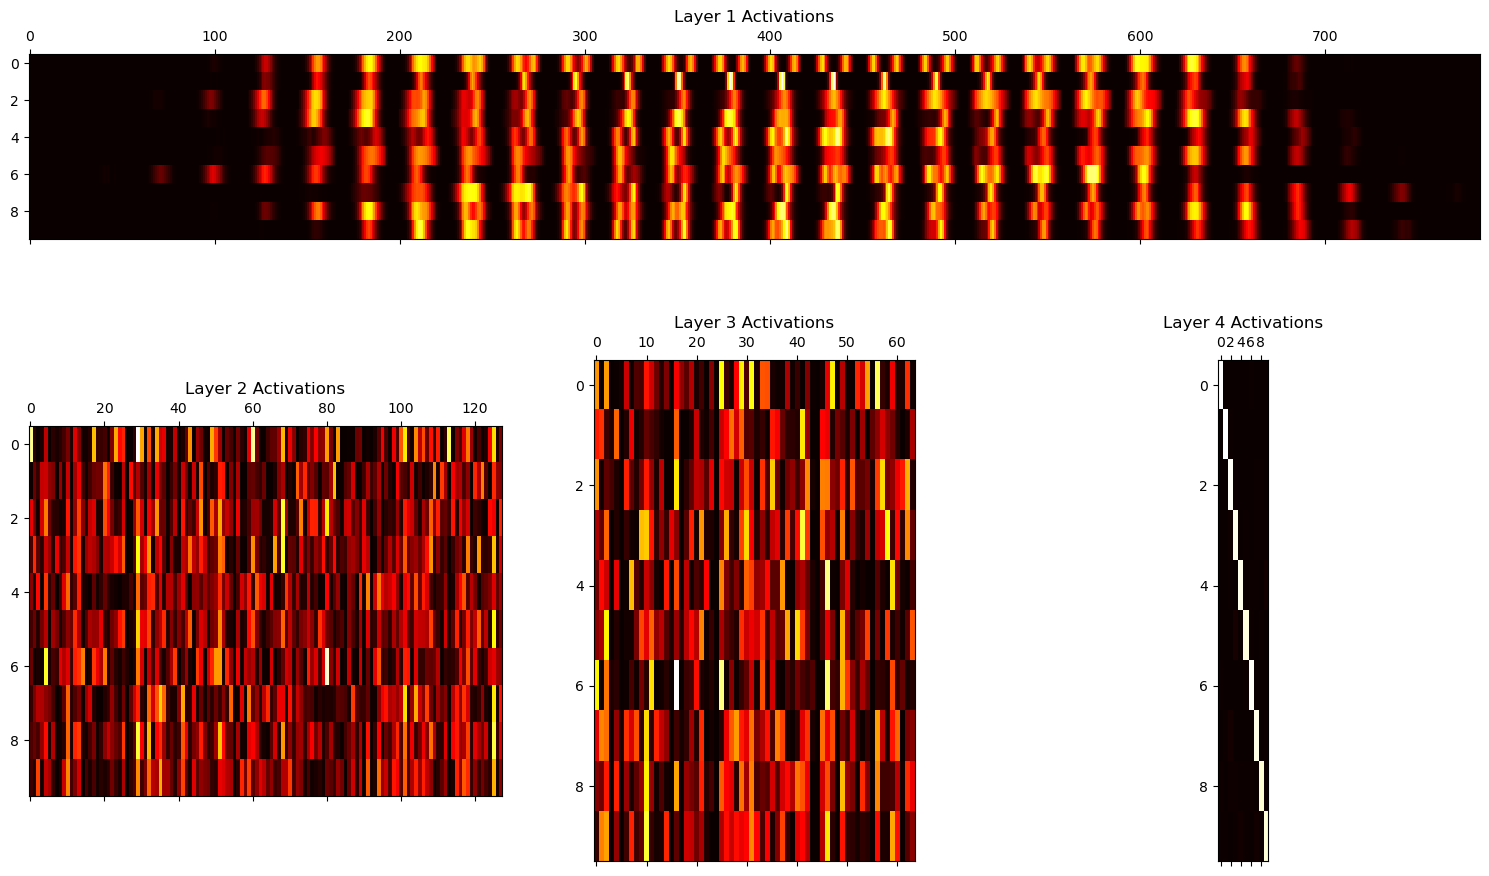

In [52]:
# Visualize the activations of the first hidden layer
# neuron_activation_computer.visualize_activations(0)
# neuron_activation_computer.visualize_activations_for_neuron(2, 50)
neuron_activation_computer.visualize_activations_for_layer(2)
# neuron_activation_computer.visualize_activations_for_label(4)

In [ ]:
# Get the layer outputs for the test data
layer_outputs = []
for layer in model.layers:
    if hasattr(layer, 'output'):
        layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
        layer_outputs.append(layer_model.predict(x_test))

# Compute the neuron activations averaged for each label
num_layers = len(layer_outputs)
num_neurons = sum(outputs.shape[-1] for outputs in layer_outputs)
neuron_activations = np.zeros((num_classes, num_neurons))

for label_idx in range(num_classes):
    label_test_data = x_test[np.argmax(y_test, axis=1) == label_idx]
    label_activations = np.zeros((num_neurons,))
    neuron_idx = 0
    for j, outputs in enumerate(layer_outputs):
        num_neurons_in_layer = outputs.shape[-1]
        label_activations[neuron_idx:neuron_idx + num_neurons_in_layer] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
        neuron_idx += num_neurons_in_layer
    neuron_activations[label_idx] = label_activations

# Print the neuron activations matrix
print(neuron_activations)

In [ ]:
len(neuron_activations)

In [ ]:
#plot the matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))  # Set the initial figure size
plt.matshow(neuron_activations, cmap='hot', interpolation='nearest', aspect=20)
plt.gcf().set_figheight(12)
plt.gcf().set_figwidth(30)
plt.show()


In [ ]:
# Get the layer outputs for EVERY LAYER as a 2dmatrix in list the test data
layer_outputs = []
for layer in model.layers:
    if hasattr(layer, 'output'):
        layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
        layer_outputs.append(layer_model.predict(x_test))

# Compute the neuron activations averaged for each label and each layer
layer_activations = []
for outputs in layer_outputs:
    num_neurons_in_layer = outputs.shape[-1]
    layer_activation = np.zeros((num_classes, num_neurons_in_layer))
    for label_idx in range(num_classes):
        layer_activation[label_idx] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
    layer_activations.append(layer_activation)

# Print the neuron activations matrix for each layer
# for i, layer_activation in enumerate(layer_activations):
#     print(f"Layer {i} neuron activations:")
#     print(layer_activation)
#     print()

In [ ]:
#plot the matrix
import matplotlib.pyplot as plt

for layer in layer_activations:
    plt.figure(figsize=(12, 12))  # Set the initial figure size
    plt.matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
    plt.gcf().set_figheight(12)
    plt.gcf().set_figwidth(30)
    plt.show() 

Now I am going o go on a side track. Here my vision is to create a "Phantom 4" Where I perform data augmentation to remove the stalks from the 4s and then prove that I can sill recover the 4s with high accuracy using the ablation to elarn the stalk identification fromt the mean activation using PCA.

In [ ]:
type(layer_activations)

In [ ]:
# Here I am going to graph the initial 4 activation before I start
just_4 = []
just_7 = []

max_len = max(len(layer) for layer in layer_activations)  # Find the maximum length

for layer in layer_activations:
    padded_layer = np.pad(layer, (0, max_len - len(layer)), 'constant', constant_values=0)  # Pad the layer
    just_4.append(padded_layer[4])
    just_7.append(padded_layer[7])

In [ ]:
# Find the maximum length of any list in just_4
max_len = max(len(lst) for lst in just_4)

# Pad each list in just_4 to make them the same length
just_4_padded = [np.pad(lst, (0, max_len - len(lst)), 'constant', constant_values=0) for lst in just_4]

# Convert the padded list of lists to a numpy array
just_4_array = np.array(just_4_padded)

In [ ]:
# Create a heatmap
plt.imshow(just_4_array, cmap='hot', interpolation='nearest', aspect=100)
plt.colorbar()  # Show color scale
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(20)
plt.ylabel('Layers')
plt.xlabel('Neurons')
plt.show()

Now its time to get the augmented 4s

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show 10 4s
list_4s = []
for i in range(len(x_test)):
    if y_test[i] == 4:
        list_4s.append(x_test[i])

# plot 10 images with the label 4s
fig, axs = plt.subplots(2, 5, figsize=(4, 3)) 
for i in range(10):
    row = i // 5 
    col = i % 5  
    axs[row, col].imshow(list_4s[i].reshape(28, 28), cmap='gray') 
    axs[row, col].set_title(f'Label: {4}')  
    axs[row, col].axis('off')  
plt.tight_layout() 
plt.show() 

In [ ]:
# Now Lets create a dataset of ablated 4s
# if not os.path.exists('4_dataset'):
#     os.makedirs('4_dataset', exist_ok=True)

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

list_4s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 4]
ablated_list_4s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 4]

def find_best_line(image):
    row_sums = [sum(row) for row in image]
    max_row_idx = row_sums.index(max(row_sums))
    return max_row_idx

def ablated4(image, index):
    max_row_idx = find_best_line(image)
    image = image.reshape(28, 28)
    image[:, (max_row_idx-2):] = 0  # Fill between max_row_idx and 27 with black
    # np.save('7_dataset/abalated_image_' + str(index), image)

# Create the new dataset of stalked 4s
for index, image in enumerate(list_4s):
    ablated4(image, index)


(x_train, y_train), (x_test, y_test) = mnist.load_data()
list_4s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 4]

Now we are going to run the destalked 4s through the nn

Realized this will be easier with 7

In [ ]:
# make a directory 7_dataset
# if not os.path.exists('7_dataset'):
#     os.makedirs('7_dataset', exist_ok=True)

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

list_7s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 7]
ablated_list_7s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 7]

def find_best_line(image):
    row_sums = [sum(row) for row in image]
    max_row_idx = row_sums.index(max(row_sums))
    return max_row_idx

def ablated7(image, index):
    max_row_idx = find_best_line(image)
    image = image.reshape(28, 28)
    image[:(max_row_idx+3), :] = 0  # Fill between max_row_idx and 27 with black
    image[:17, :13] = 0  # Fill between 0 and 17 with black in the range 0 to 12
    # plt.imshow(image, cmap='gray')
    # np.save('7_dataset/abalated_image_' + str(index), image)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
list_7s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 7]   

for index, image in enumerate(ablated_list_7s):
    ablated7(image, index)

In [ ]:
# now feed in the ablated 7s and original 7s to the model and predict the class for each then graph that
def get4results():
    origional_results_4 = []
    abalated_results_4 = []

    for image in list_4s:
        origional_results_4.append(np.argmax(model.predict(image.reshape(1, 784))))
    for image in ablated_list_4s:
        abalated_results_4.append(np.argmax(model.predict(image.reshape(1, 784))))

    return origional_results_4, abalated_results_4

def get7results():
    origional_results_7 = []
    abalated_results_7 = []

    for image in list_7s:
        origional_results_7.append(np.argmax(model.predict(image.reshape(1, 784))))
    for image in ablated_list_7s:
        abalated_results_7.append(np.argmax(model.predict(image.reshape(1, 784))))

    return origional_results_7, abalated_results_7

In [ ]:
origional_results_4, ablated_results_4 = get4results()

In [ ]:
origional_results_7, ablated_results_7 = get7results()

In [ ]:
# print the accuracy of the model on the ablated 4s using origional_results_4 and ablated_results_4
def numCorrect(data, target, ab):
    correct = 0
    for i in range(len(data)):
        if data[i] == target:
            correct += 1
    if ab:
        print(f"Accuracy on the ablated {target}s: {correct / len(data)}")
    else:
        print(f"Accuracy on the origional {target}s: {correct / len(data)}")
    return correct / len(data)


numCorrect(origional_results_4, 4, False)
numCorrect(ablated_results_4, 4, True)
print("------------------------------------------------")
numCorrect(origional_results_7, 7, False)
numCorrect(ablated_results_7, 7, True)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

data = [(origional_results_7, ablated_results_7), (origional_results_4, ablated_results_4)]
labels = [('Original 7s', 'Ablated 7s'), ('Original 4s', 'Ablated 4s')]

for i, ax in enumerate(axs.flatten()):
    ax.hist(data[i][0], bins=10, color='blue', edgecolor='black', alpha=0.5, label=labels[i][0])
    ax.hist(data[i][1], bins=10, color='red', edgecolor='black', alpha=0.5, label=labels[i][1])

    ax.set_title(f'{labels[i][0]} vs {labels[i][1]}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# This shows the side by side comparison of the ablated 7s and the original 7s
(x_train, y_train), (x_test, y_test) = mnist.load_data()
list_7s = [x_test[i] for i in range(len(x_test)) if y_test[i] == 7]

images = [ablated_list_7s[0], list_7s[0]]

for i in range(20):
    plt.figure(figsize=(2, 2))
    
    plt.subplot(1, 2, 1)
    plt.imshow(ablated_list_7s[i].reshape(28, 28), cmap='gray')
    guess1 = np.argmax(model.predict(ablated_list_7s[i].reshape(1, 784)))
    plt.title(f"Class: {guess1}")
    
    plt.subplot(1, 2, 2)
    plt.imshow(list_7s[i].reshape(28, 28), cmap='gray')
    guess2 = np.argmax(model.predict(list_7s[i].reshape(1, 784)))
    plt.title(f"Class: {guess2}")
    
    plt.show()